In [1]:
import torch
from PIL import Image

from kandinsky3 import get_T2I_unet, get_T5encoder, get_movq, get_inpainting_unet
from kandinsky3 import Kandinsky3T2IPipeline, Kandinsky3InpaintingPipeline


libgomp: Invalid value for environment variable OMP_NUM_THREADS


[2023-11-14 13:55:00,667] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)



libgomp: Invalid value for environment variable OMP_NUM_THREADS

libgomp: Invalid value for environment variable OMP_NUM_THREADS


In [2]:
device = torch.device('cuda')

In [3]:
unet, null_embedding, projections_state_dict = get_T2I_unet(
    device,
    'path/to/weights/',
    fp16=True
)

100%|██████████| 72/72 [00:04<00:00, 17.04it/s]


In [4]:
processor, condition_encoders = get_T5encoder(
    device,
    'path/to/weights/', 
    projections_state_dict
)

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [5]:
movq = get_movq(
    device,
    'path/to/weights/',
    fp16=False
)

## Text to image

In [6]:
t2i_pipe = Kandinsky3T2IPipeline(device, unet, null_embedding, processor, condition_encoders, movq)

100%|██████████| 50/50 [00:06<00:00,  7.16it/s]


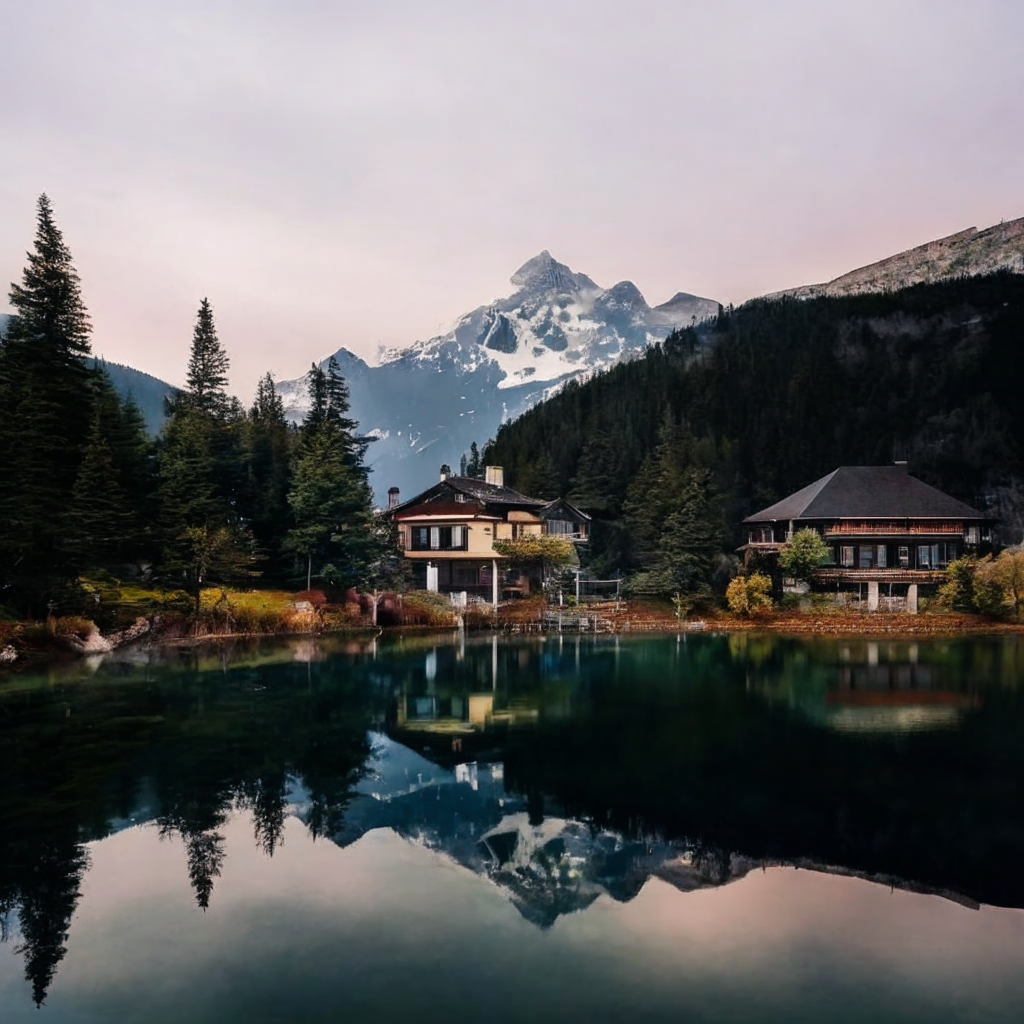

In [15]:
t2i_pipe('a house around lake with mountain in the background')[0]

## Inpainting

In [12]:
conf, inpainting_unet, _, _ = get_inpainting_unet(
    device,
    'path/to/config.yalm',
    'path/to/weights/',
    fp16=False
)

In [13]:
inpainting_pipe = Kandinsky3InpaintingPipeline(
    device, conf, inpainting_unet, null_embedding, processor, condition_encoders, movq, fp16=False
)

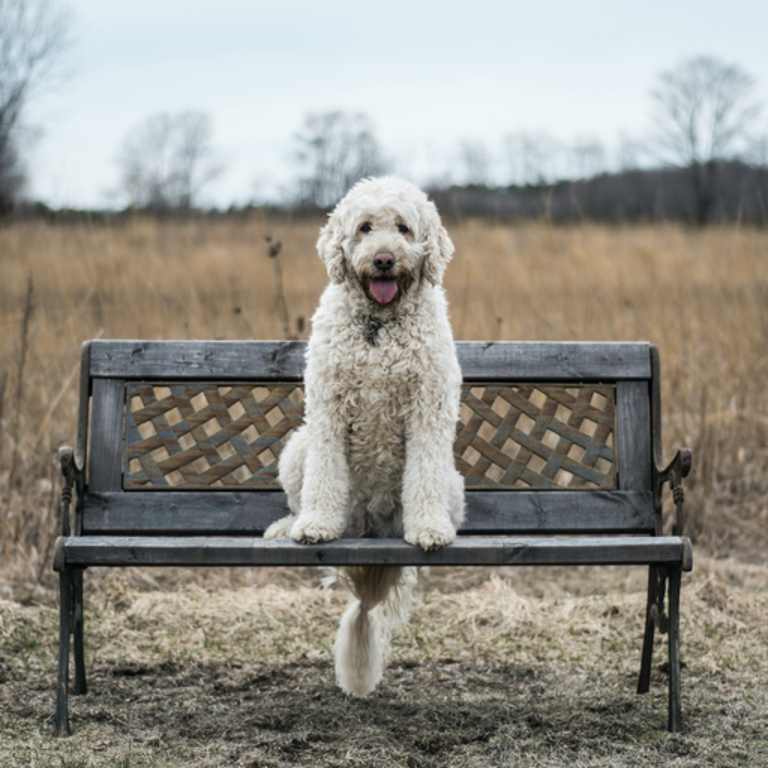

In [10]:
import requests
from io import BytesIO

def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"
image = download_image(img_url).resize((768, 768))
mask_image = download_image(mask_url).resize((768, 768))
image

100%|██████████| 50/50 [00:07<00:00,  6.38it/s]


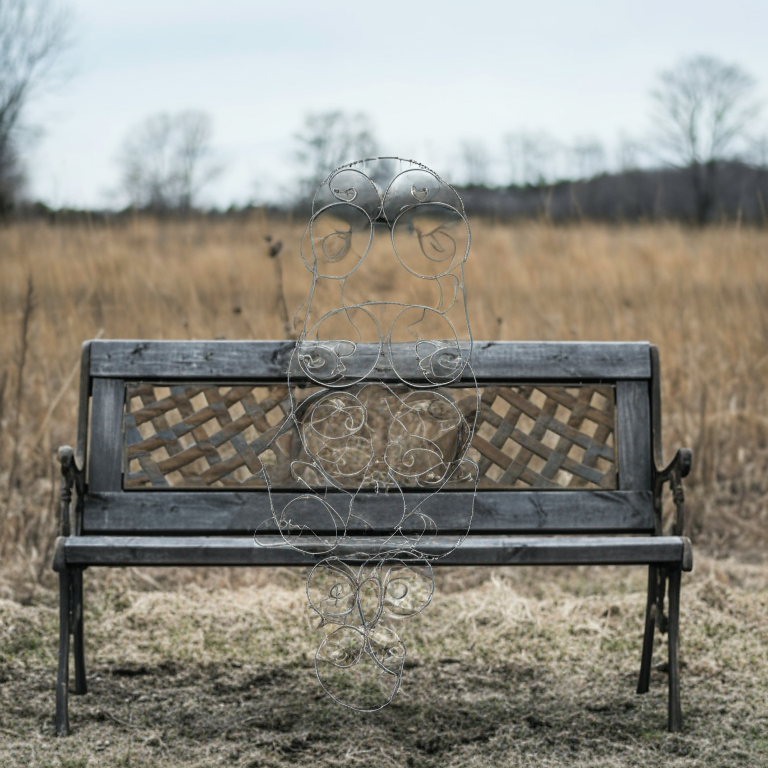

In [14]:
inpainting_pipe("bench", image, mask_image)